In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

file_path = '../data/processed/Juegorawg_limpio.csv'
df = pd.read_csv(file_path)
df.copy()

df["playtime_log"] = np.log1p(df["playtime"])  # Transformación logarítmica

# Calcular cuartiles
Q1 = df["playtime_log"].quantile(0.25)
Q3 = df["playtime_log"].quantile(0.75)

# Función para clasificar
def categorize_playtime(x):
    if x < Q1:
        return "Bajo"
    elif Q1 <= x <= Q3:
        return "Medio"
    else:
        return "Alto"


df["playtime_category"] = df["playtime_log"].apply(categorize_playtime)



X = df.drop(columns=["playtime", "playtime_log", "playtime_category", "slug", "name", "updated"])
y = df["playtime_category"]


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalizar los datos numéricos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Mostrar los resultados
result_df = pd.DataFrame(report).transpose()



In [3]:
result_df

,precision,recall,f1-score,support
Alto,0.500000,0.065089,0.115183,169.000000
Medio,0.784153,0.981197,0.871678,585.000000
accuracy,0.775862,0.775862,0.775862,0.775862
macro avg,0.642077,0.523143,0.493431,754.000000
weighted avg,0.720464,0.775862,0.702119,754.000000


### Exactitud del modelo(Accuracy)

In [4]:
print(f"Exactitud del modelo: {accuracy_score(y_test, y_pred):.2f}")

Exactitud del modelo: 0.78


## Reporte de clasificacion

In [5]:
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Reporte de Clasificación:
              precision    recall  f1-score   support

        Alto       0.50      0.07      0.12       169
       Medio       0.78      0.98      0.87       585

    accuracy                           0.78       754
   macro avg       0.64      0.52      0.49       754
weighted avg       0.72      0.78      0.70       754



## Calcular la matriz de confusion

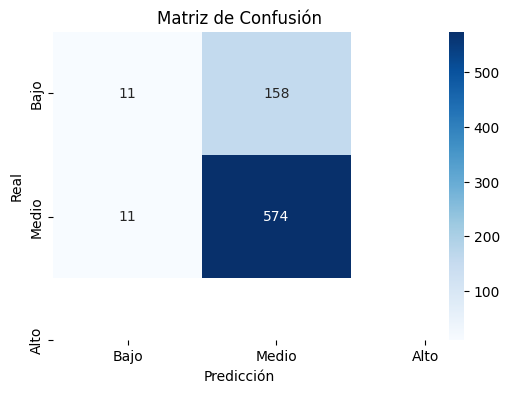

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Bajo", "Medio", "Alto"],
            yticklabels=["Bajo", "Medio", "Alto"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

## 📌 Conclusión del Modelo de Clasificación
- El modelo de Random Forest logró una exactitud del 77.6%, lo cual indica un desempeño aceptable, pero no óptimo. Sin embargo, al analizar más a fondo los resultados, encontramos algunas limitaciones importantes:

## 🔹 Puntos Fuertes del Modelo
- ✅ La categoría "Medio" tiene una alta precisión y recall, lo que indica que el modelo puede identificar bien estos juegos.
- ✅ El modelo es capaz de aprender patrones de los datos sin necesidad de preprocesamiento complejo.
- ✅ Random Forest es un modelo robusto y estable, por lo que los resultados son consistentes.

# 🔻 Limitaciones y Problemas Detectados
- ⚠️ La categoría "Alto" tiene un rendimiento muy bajo (precisión del 50% y recall del 6.5%), lo que significa que el modelo no predice bien los juegos con alta jugabilidad.
- ⚠️ Desbalance de clases: La clase "Alto" tiene menos datos, lo que hace que el modelo no aprenda bien a identificarla.